<a href="https://colab.research.google.com/github/Randyguzman/Filtros_Preprocesamiento/blob/main/FiltroMedio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO
from PIL import Image
from os import remove

In [ ]:
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = numpy.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final

In [34]:
def main():

    uploaded = files.upload()
    inimg = Image.open('TC1.jpg')
    img = inimg.convert("L")
    arr = numpy.array(img)
    removed_noise = median_filter(arr, 3)
    img2 = Image.fromarray(removed_noise)
    #img.show()

    fig1 = plt.figure(1)
    ax1, ax2 = fig1.add_subplot(121), fig1.add_subplot(122)
    ax1.imshow(inimg)
    ax2.imshow(img2, cmap=plt.get_cmap('gray'))
    fig1.show()

    #plt.imsave(r'C:\Users\randy\OneDrive\Escritorio\TCF.jpg', img2, cmap=plt.get_cmap('gray'))

In [36]:
remove("TC1.jpg")

Saving TC1.jpg to TC1.jpg


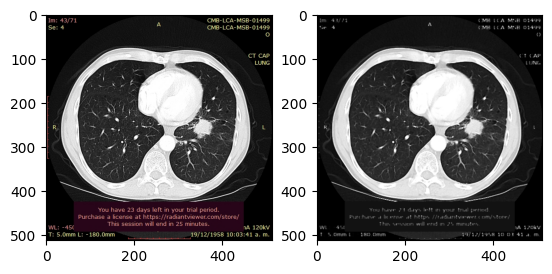

In [37]:
main()